In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
#loading dataset
supermarket_data=pd.read_csv('/content/supermarket_sales.csv')

In [6]:
supermarket_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
supermarket_data.shape

(1000, 17)

In [8]:
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Categorical Features:

-Invoice ID

-Branch

-city

-customer type

-Gender

-Product Line

-date

-time

-payment

In [9]:
supermarket_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
supermarket_data['gross income'].mean()

15.379368999999999

In [11]:
supermarket_data['Payment'].mode()

0    Ewallet
dtype: object

DATA analysis

In [12]:
#statical daata
supermarket_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [13]:
sns.set()

<Figure size 432x432 with 0 Axes>

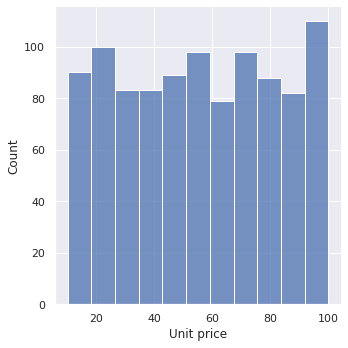

In [14]:
#unit price distibution
plt.figure(figsize=(6,6))
sns.displot(supermarket_data['Unit price'])
plt.show()

<Figure size 432x432 with 0 Axes>

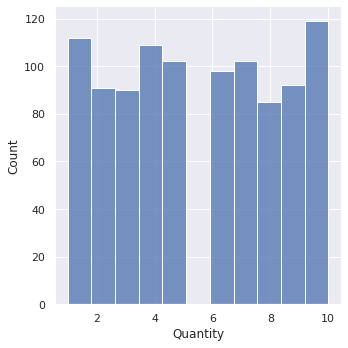

In [15]:
#Quantity distibution
plt.figure(figsize=(6,6))
sns.displot(supermarket_data['Quantity'])
plt.show()

<Figure size 432x432 with 0 Axes>

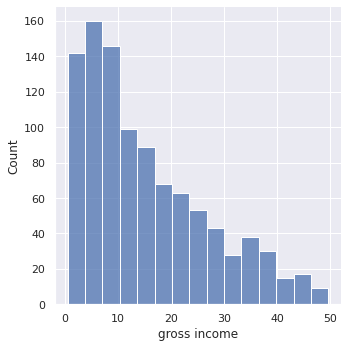

In [16]:
#gross income distibution
plt.figure(figsize=(6,6))
sns.displot(supermarket_data['gross income'])
plt.show()

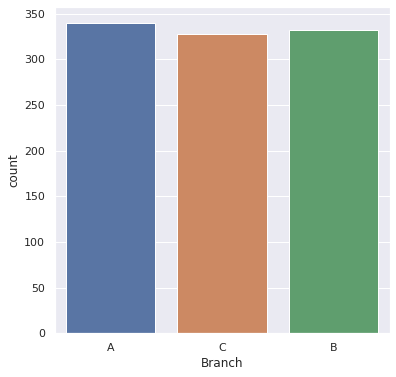

In [17]:
#Branch distibution
plt.figure(figsize=(6,6))
sns.countplot(x='Branch',data=supermarket_data)
plt.show()

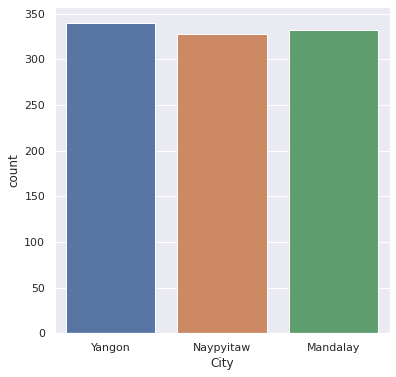

In [18]:
#City distibution
plt.figure(figsize=(6,6))
sns.countplot(x='City',data=supermarket_data)
plt.show()

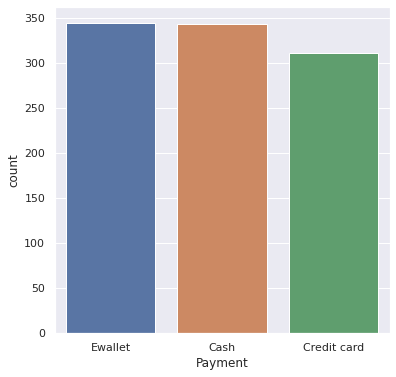

In [19]:
#Payment distibution
plt.figure(figsize=(6,6))
sns.countplot(x='Payment',data=supermarket_data)
plt.show()

Data Pre-Processing

In [20]:
supermarket_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [21]:
supermarket_data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Label Encoding

In [22]:
encoder=LabelEncoder()

In [23]:
supermarket_data['Invoice ID']=encoder.fit_transform(supermarket_data['Invoice ID'])
supermarket_data['Branch']=encoder.fit_transform(supermarket_data['Branch'])
supermarket_data['City']=encoder.fit_transform(supermarket_data['City'])
supermarket_data['Customer type']=encoder.fit_transform(supermarket_data['Customer type'])
supermarket_data['Gender']=encoder.fit_transform(supermarket_data['Gender'])
supermarket_data['Product line']=encoder.fit_transform(supermarket_data['Product line'])
supermarket_data['Date']=encoder.fit_transform(supermarket_data['Date'])
supermarket_data['Time']=encoder.fit_transform(supermarket_data['Time'])
supermarket_data['Payment']=encoder.fit_transform(supermarket_data['Payment'])


In [24]:
supermarket_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3


Splitting features and Target

In [25]:
x=supermarket_data.drop(columns='Total',axis=1)
y=supermarket_data['Total']

In [26]:
print(x)

     Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
995         153       2     1              1       1             3   
996         250       1     0              1       0             4   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%  Date  Time  Payment    cogs  \
0         74.69         7  26.1415    26   146        2  522.83   
1         15.28         5

In [27]:
print(y)

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64


Splitting the data into Training data & Testing Data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2) 

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 16) (800, 16) (200, 16)


Machine Learning Model Training

XGBoost Regressor

In [30]:
regressor=XGBRegressor()

In [31]:
regressor.fit(x_train,y_train)

[09:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [32]:
# prediction on training data
training_data_prediction=regressor.predict(x_train)

In [33]:
# R squared Value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [34]:
print("R squared value",r2_train)

R squared value 0.9999644093663996


In [35]:
# prediction on testing data
test_data_prediction=regressor.predict(x_test)

In [36]:
# R squared Value
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [37]:
print("R squared value",r2_test)

R squared value 0.9999337478977522


**Saving model**

In [38]:
import joblib

In [41]:
joblib.dump(regressor,r'C:\Users\sanga\OneDrive\Desktop\sangam\project\supermarket_sales_prediction\models\xgb.sav')

['C:\\Users\\sanga\\OneDrive\\Desktop\\sangam\\project\\supermarket_sales_prediction\\models\\xgb.sav']